In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unrar x -Y "drive/MyDrive/AI_Datasets/driving_dataset.rar"

Streaming output truncated to the last 5000 lines.
Extracting  driving_dataset/5646.jpg                                      89%  OK 
Extracting  driving_dataset/5647.jpg                                      89%  OK 
Extracting  driving_dataset/5648.jpg                                      89%  OK 
Extracting  driving_dataset/5649.jpg                                      89%  OK 
Extracting  driving_dataset/565.jpg                                       89%  OK 
Extracting  driving_dataset/5650.jpg                                      89%  OK 
Extracting  driving_dataset/5651.jpg                                      89%  OK 
Extracting  driving_dataset/5652.jpg                                      89%  OK 
Extracting  driving_dataset/5653.jpg                                      89%  OK 
Extracting  driving_dataset/5654.jpg                                      89%  OK 
Extracting  driving_dataset/5

In [ ]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

NameError: ignored

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import tensorflow as tf

#data_dir = "C:\AI Datasets\driving_dataset"
data_dir = "driving_dataset"
sep = "/"

In [ ]:

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=7200)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [ ]:
img = data_dir + sep + os.listdir(data_dir)[15000]
print(img)
img = imread(img)

driving_dataset/15435.jpg


In [ ]:
dim1 = 100 #256
dim2 = 260 #455
#136*325 = 44200
#256*455 = 116480
#target = 10336
#target_bw = 31482
dimx = int(65*np.mean(dim1)/100)
dimy = int(65*np.mean(dim2)/100)
image_shape = (dimy, dimx)
print(dimy*dimx)

10985


(65, 169, 3)

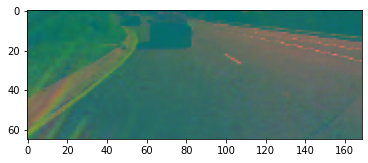

In [ ]:
img = img[125:225,120:380]
img = cv2.resize(img, image_shape, interpolation= cv2.INTER_LINEAR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img = img**1.999

#plt.imshow(img)
# blurred = cv2.GaussianBlur(img, (11, 11), 3)
# img = cv2.adaptiveThreshold(blurred, 255,
#                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 12, 4)
# img = cv2.bitwise_not(thresh)

max = np.max(img)
min = np.min(img)
#img = 2*(img-min)/(max-min)-1
img = (img-min)/(max-min)

plt.imshow(img)
img.shape

dim1 = []
dim2 = []
for image_filename in os.listdir(data_dir):
    if image_filename[-3:] == 'jpg':
        img = imread(data_dir+'\\'+image_filename)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.jointplot(x=dim1,y=dim2)
print(np.mean(dim1))
print(np.mean(dim2))
dimx = int(25*np.mean(dim1)/100)
dimy = int(25*np.mean(dim2)/100)
image_shape = (dimy, dimx)

In [ ]:
def process_img(img):
    img = img[125:225,120:380]
    img = cv2.resize(img, image_shape, interpolation= cv2.INTER_LINEAR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img = img/255.0
    img = img**1.999
    max = np.max(img)
    min = np.min(img)
    #img = 2*(img-min)/(max-min)-1
    img = (img-min)/(max-min)
    return img

imgs_train_aux = []
imgs_eval_aux = []
imgs_train = []
imgs_eval = []
break_point = 5000
take_img = 0
for image_filename in os.listdir(data_dir):
    if image_filename[-3:] == 'jpg':
        if take_img%16<=14:
            img = imread(data_dir+sep+image_filename)
            img = process_img(img)
            imgs_train_aux.append(img)
        elif take_img%16==15: 
            img = imread(data_dir+sep+image_filename)
            img = process_img(img)
            img = cv2.flip(img, 1)
            imgs_eval_aux.append(img)
        if take_img%break_point==0 and take_img!=0:
          print(take_img)
          if(take_img == break_point):
            imgs_train = np.array(imgs_train_aux)
            imgs_eval = np.array(imgs_eval_aux)
          else:
            imgs_train = np.append(imgs_train, np.array(imgs_train_aux), axis = 0)
            imgs_eval = np.append(imgs_eval, np.array(imgs_eval_aux), axis = 0)
          imgs_train_aux = []
          imgs_eval_aux = []
        take_img += 1

imgs_train = np.append(imgs_train, np.array(imgs_train_aux), axis = 0)
imgs_eval = np.append(imgs_eval, np.array(imgs_eval_aux), axis = 0)
imgs_train_aux = []
imgs_eval_aux = []

5000
10000
15000
20000
25000
30000
35000
40000
45000


In [ ]:
# imgs_train = np.array(imgs_train)
# imgs_eval = np.array(imgs_eval)
print(imgs_train.shape)
print(imgs_eval.shape)

(42569, 65, 169, 3)
(2837, 65, 169, 3)


In [ ]:
data_file = open(data_dir+ sep +"data.txt", "r")

In [ ]:
data_train = []
data_eval = []
take_img = 0
for data in data_file:
    if take_img%16<=14:
        data_train.append(np.double(data.split()[1]))
    if take_img%16==15:
        data_eval.append(np.double(data.split()[1]))
    take_img += 1
    
data_train = np.array(data_train)
data_eval = np.array(data_eval)
data_eval = data_eval*(-1)

In [ ]:
print(data_train.shape)
print(imgs_train.shape)
print(data_eval.shape)
print(imgs_eval.shape)

(42569,)
(42569, 65, 169, 3)
(2837,)
(2837, 65, 169, 3)


In [ ]:
print(np.min(data_train))
print(np.max(data_train))

-159.93
501.78


In [ ]:
print(np.min(data_eval))
print(np.max(data_eval))

-470.12
159.93


In [ ]:
data_train[data_train>160]=160
data_eval[data_eval<(-160)]=(-160)

In [ ]:
imgs_train = imgs_train[260:]
data_train = data_train[260:]

In [ ]:
max = np.max(data_train)
min = np.min(data_train)

a=0
b=1

data_train = ((b-a)*(data_train-min)/(max-min))+a
data_eval = ((b-a)*(data_eval-min)/(max-min))+a

In [ ]:
np.min(data_eval)

-0.0006563935860968947

In [ ]:
data_train = data_train*3
data_eval = data_eval*3
data_eval[data_eval>3] = 3

In [ ]:
imgs_train.shape

(42309, 65, 169, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,AvgPool2D,Dropout,Flatten,Activation,BatchNormalization,MaxPool2D,Lambda
from tensorflow.keras.initializers import TruncatedNormal, Constant
from tensorflow.keras import regularizers
from tensorflow.keras.activations import tanh
from tensorflow.keras.losses import MeanAbsolutePercentageError

In [ ]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
'''CNN based End to End Learning Steering Angle
Prediction for Autonomous Electric Vehicle'''
model = Sequential()

#model.add(tf.keras.layers.GaussianNoise(stddev = 0.001))
model.add(Conv2D(filters=32,kernel_size=(5, 5), activation = "ReLU",input_shape=(dimx, dimy, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3), activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3), strides = 2, activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3), activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3), strides = 2, activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3), activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3), activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3), activation = "ReLU"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation = "ReLU"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "ReLU"))
model.add(Dropout(0.5))
model.add(Dense(1))

model.build(input_shape=(None ,dimx, dimy, 1))
model.compile(loss='mse' ,optimizer='adam',metrics=[coeff_determination])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 165, 32)       2432      
                                                                 
 dropout (Dropout)           (None, 61, 165, 32)       0         
                                                                 
 batch_normalization (BatchN  (None, 61, 165, 32)      128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 163, 32)       9248      
                                                                 
 dropout_1 (Dropout)         (None, 59, 163, 32)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 59, 163, 32)      128       
 hNormalization)                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_mse',patience=2)
# early_stop = EarlyStopping(monitor='val_maps',patience=2)

In [ ]:
# imgs_train = np.expand_dims(imgs_train, axis=-1)
# imgs_eval = np.expand_dims(imgs_eval, axis=-1)
# imgs_train.shape

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, imgs, labels, batch_size):
    self.x, self.y = imgs, labels
    self.batch_size = batch_size
    self.nr_batches = np.ceil(len(x_data) / batch_size)
    self.batch_index = np.array_split(range(len(x_data)), self.nr_batches)

  def __len__(self):
    return len(self.batch_index)

  def __getitem__(self, index):
    batch_x = self.x[self.batch_index[index]]
    batch_y = self.y[self.batch_index[index]]
    return batch_x, batch_y

train_generator = DataGenerator(imgs_train, data_train, batch_size = 8)

In [ ]:
model.fit(train_generator,epochs=30,validation_data=(imgs_eval,data_eval),callbacks=[early_stop, reduce_lr])

Epoch 1/30
5289/5289 [==============================] - 2660s 502ms/step - loss: 0.3686 - coeff_determination: -4162204.0000 - val_loss: 0.2336 - val_coeff_determination: -135.6223 - lr: 0.0010
Epoch 2/30
5289/5289 [==============================] - 2635s 498ms/step - loss: 0.0945 - coeff_determination: -1225628.5000 - val_loss: 0.0695 - val_coeff_determination: -1.3797 - lr: 0.0010
Epoch 3/30
5289/5289 [==============================] - 2666s 504ms/step - loss: 0.1371 - coeff_determination: -1131457.3750 - val_loss: 0.0709 - val_coeff_determination: -2.3571 - lr: 0.0010
Epoch 4/30
5289/5289 [==============================] - 2657s 502ms/step - loss: 0.0733 - coeff_determination: -1069298.5000 - val_loss: 0.0701 - val_coeff_determination: -1.7982 - lr: 0.0010
Epoch 5/30
 386/5289 [=>............................] - ETA: 40:33 - loss: 0.0779 - coeff_determination: -1535865.7500

In [ ]:
from tensorflow import keras
img = imgs_train[15999:16000]
layer_name = 'conv2d_1'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(img)

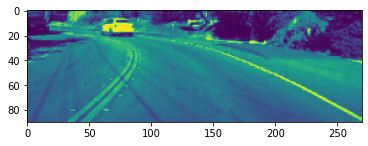

In [ ]:
plt.imshow(img[0,:,:,0])

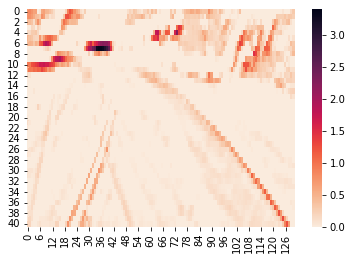

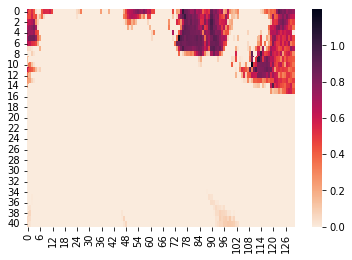

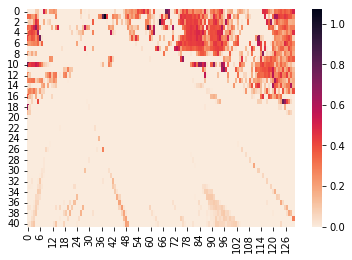

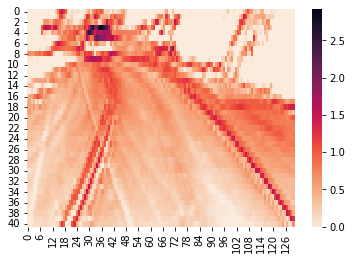

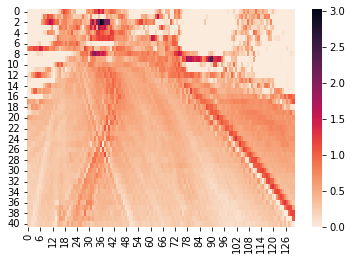

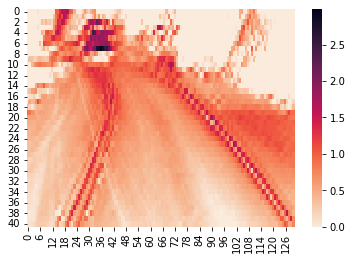

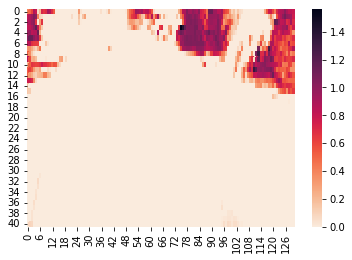

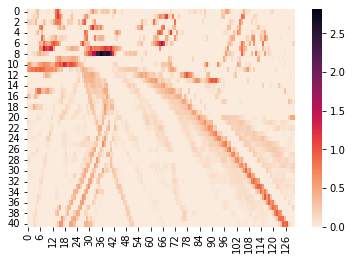

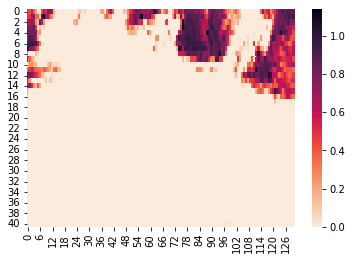

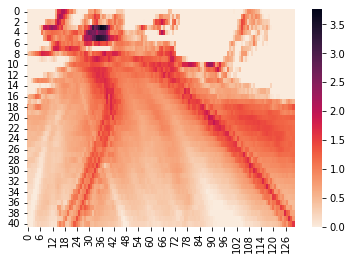

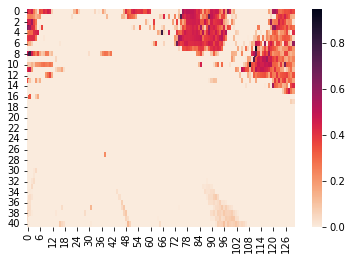

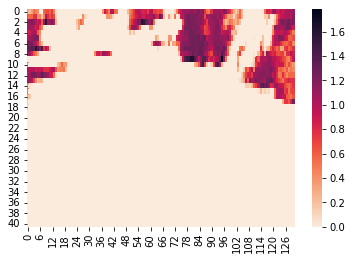

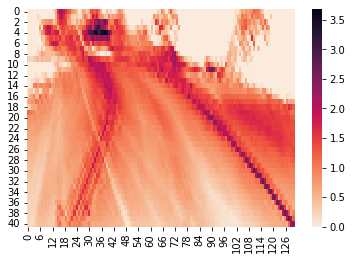

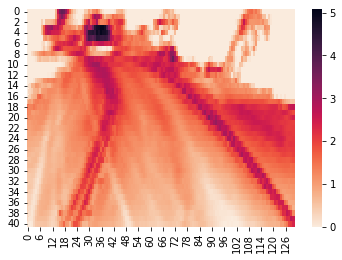

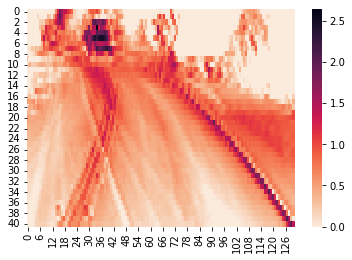

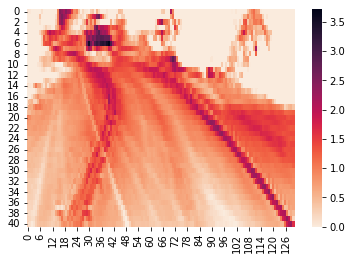

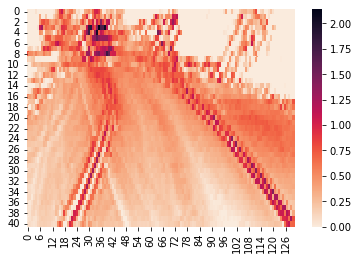

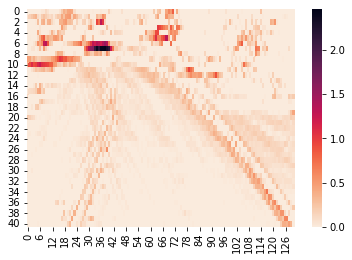

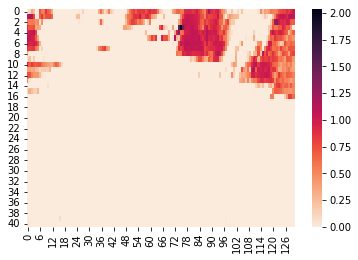

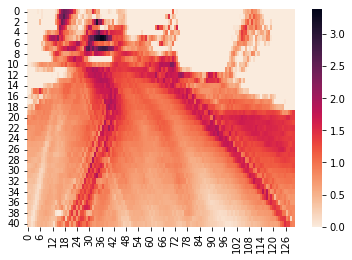

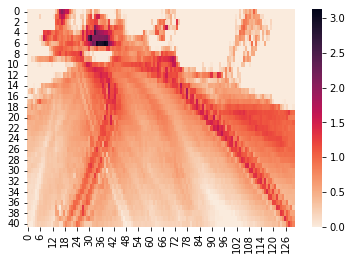

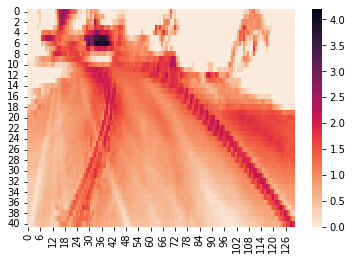

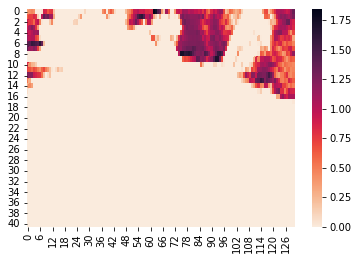

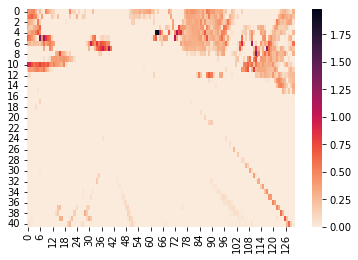

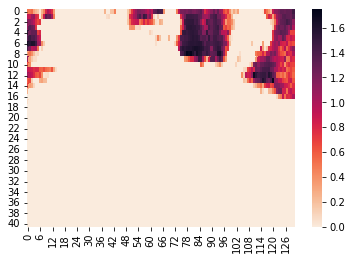

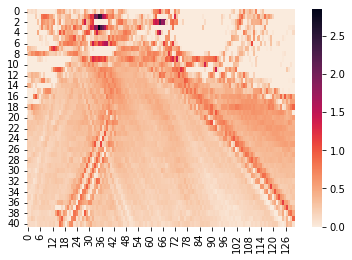

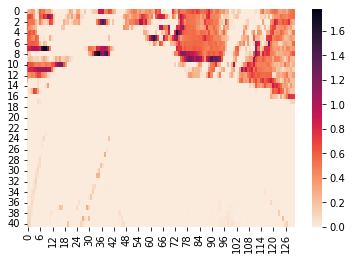

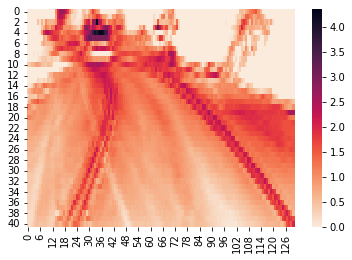

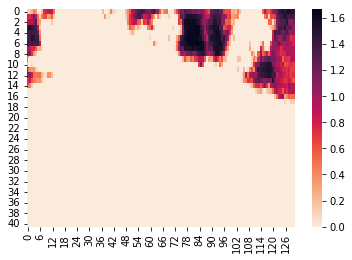

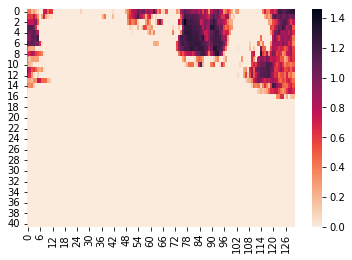

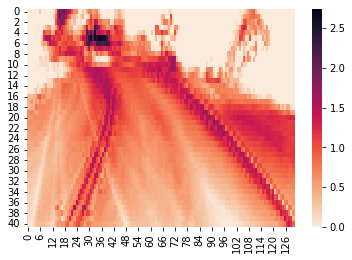

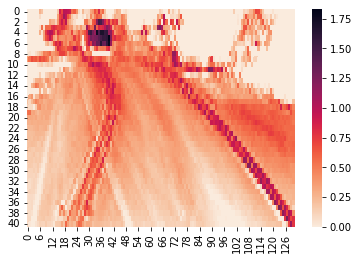

In [ ]:
for i in range(32):
    sns.heatmap(intermediate_output[0, :, :, i], cmap="rocket_r", annot=False)
    plt.show()

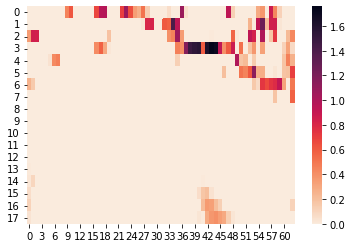

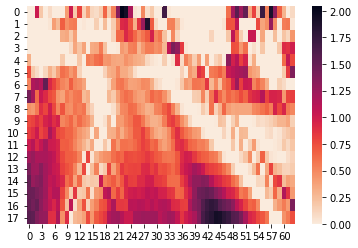

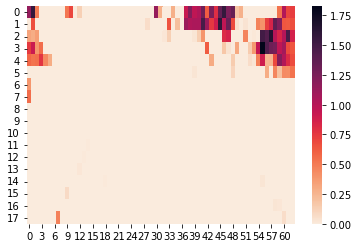

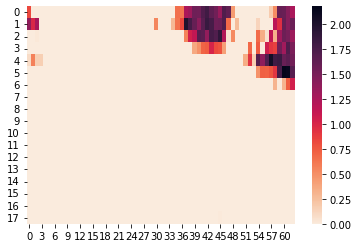

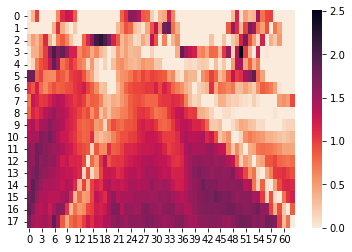

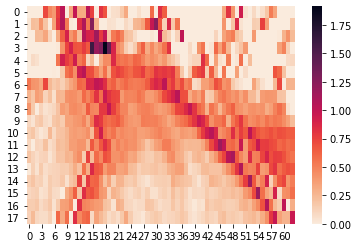

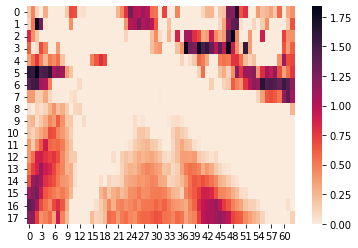

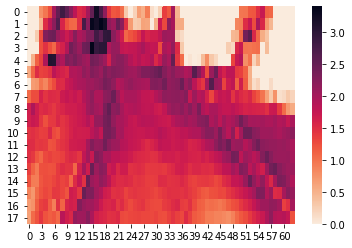

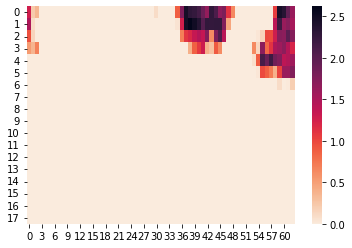

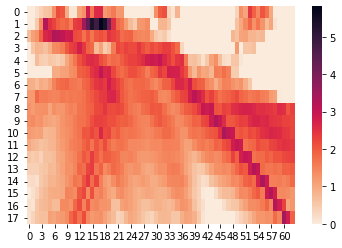

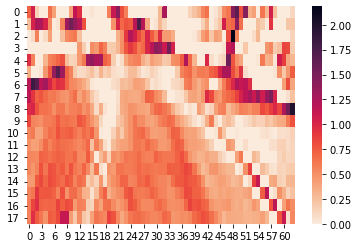

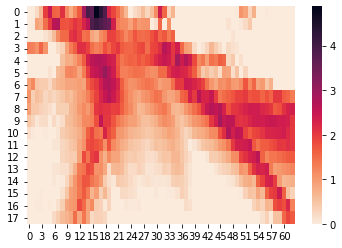

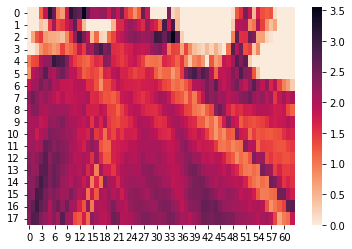

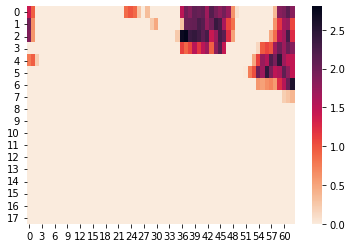

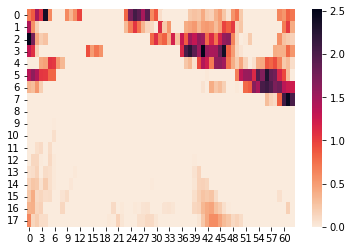

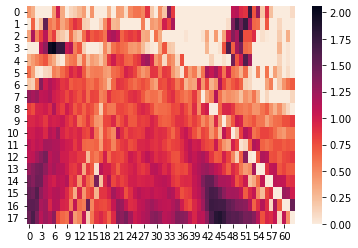

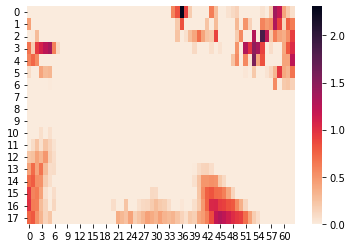

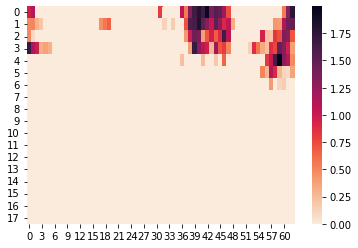

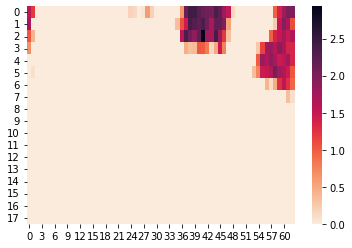

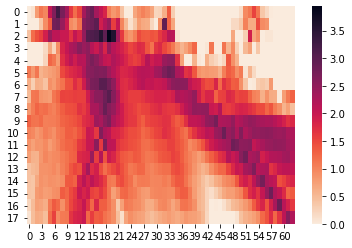

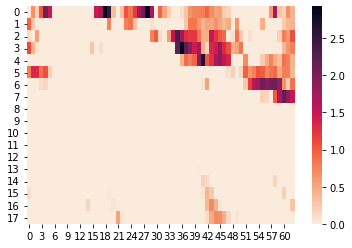

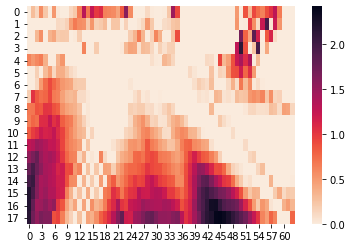

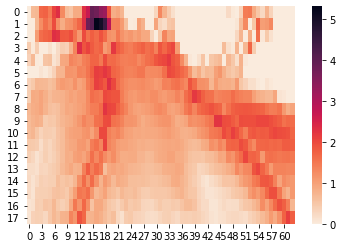

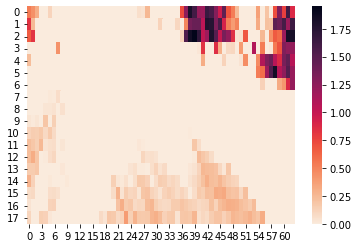

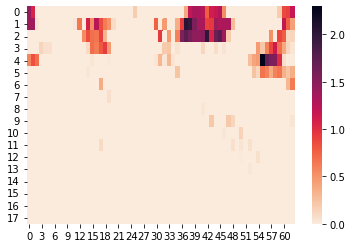

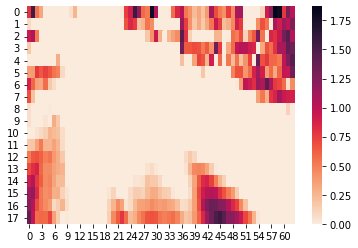

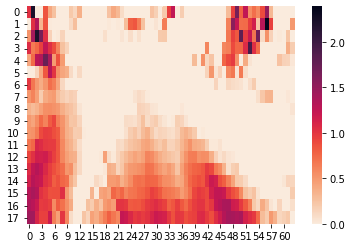

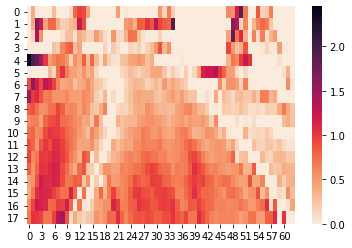

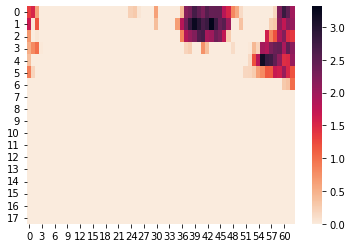

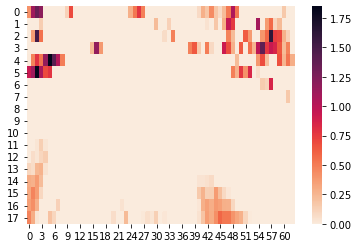

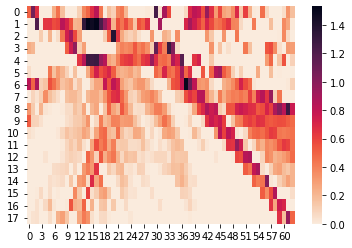

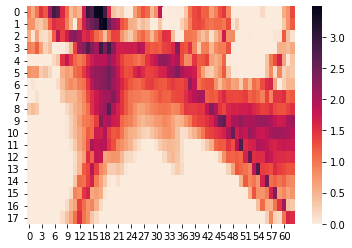

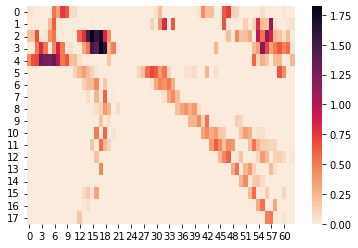

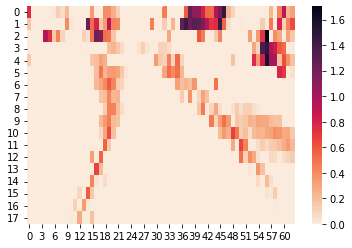

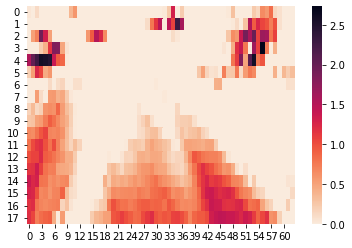

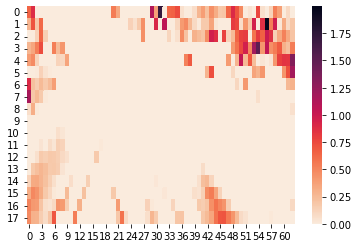

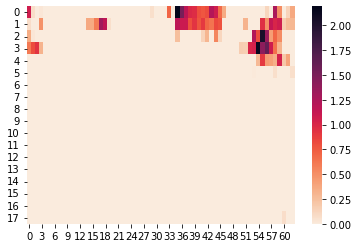

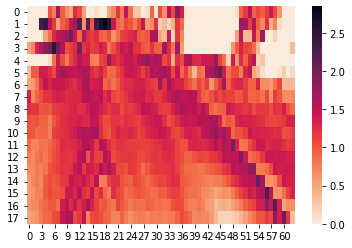

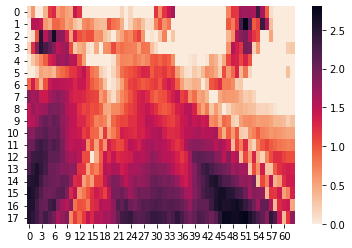

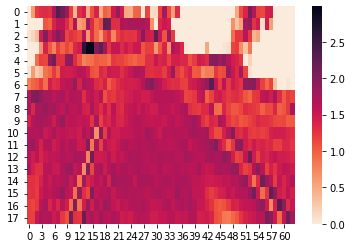

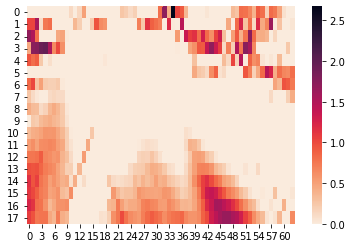

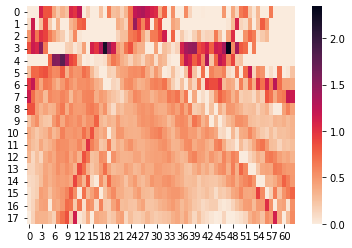

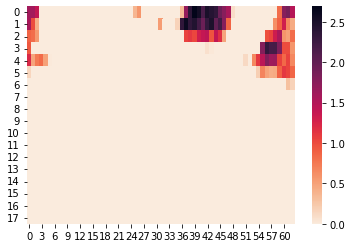

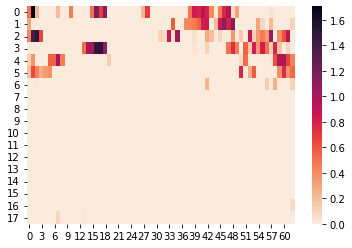

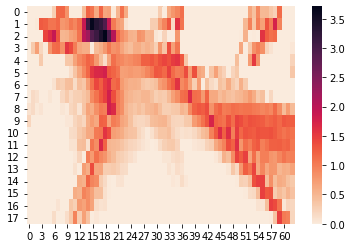

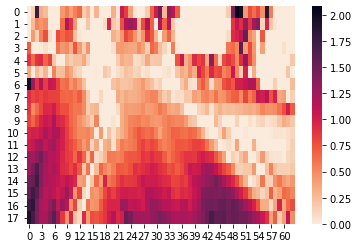

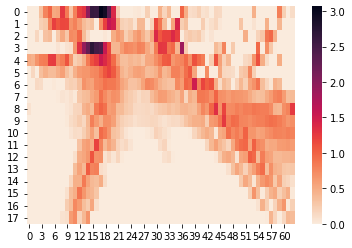

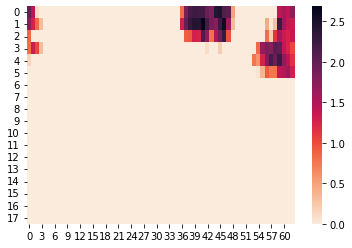

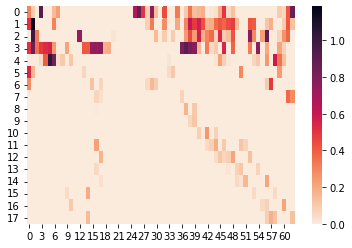

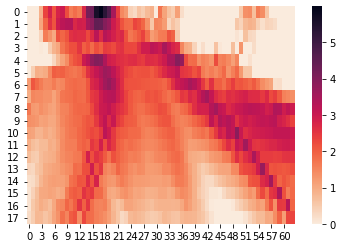

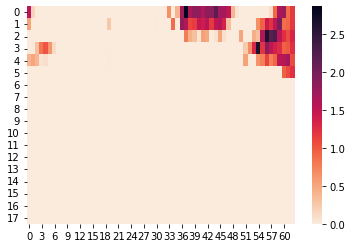

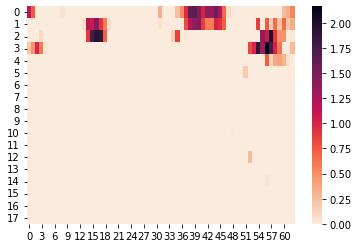

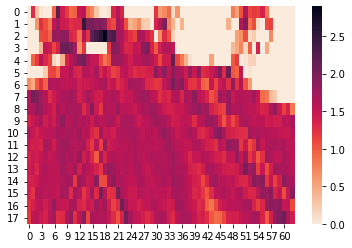

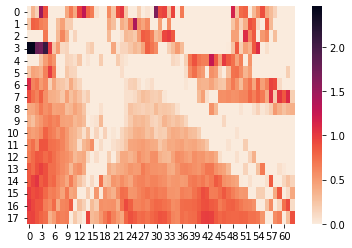

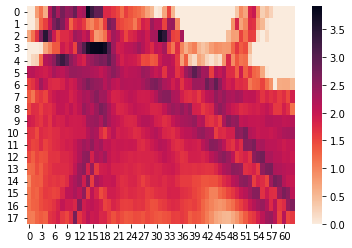

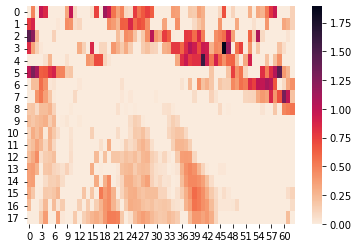

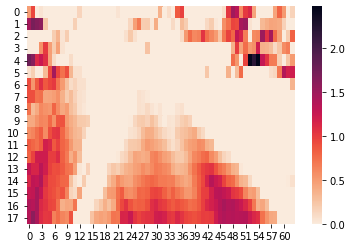

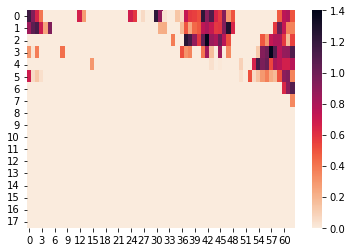

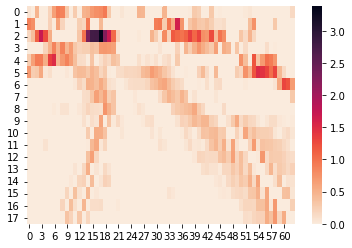

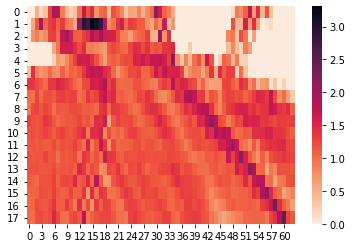

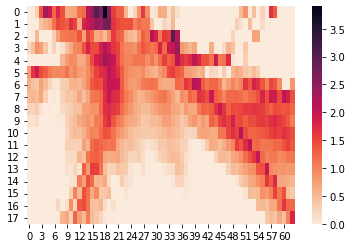

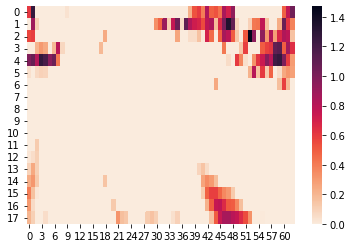

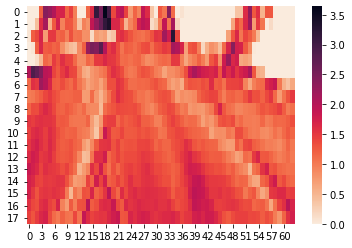

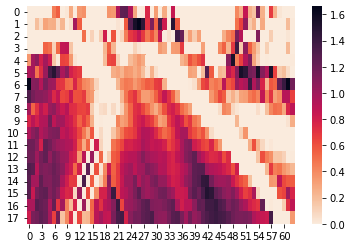

In [ ]:
layer_name = 'conv2d_3'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(img)
for i in range(64):
    sns.heatmap(intermediate_output[0, :, :, i], cmap="rocket_r", annot=False)
    plt.show()

In [ ]:
predictions = model.predict(imgs_eval)

11351
11351
[0.00405086 0.00039913 0.00310112 ... 0.0153971  0.02124336 0.01820388]


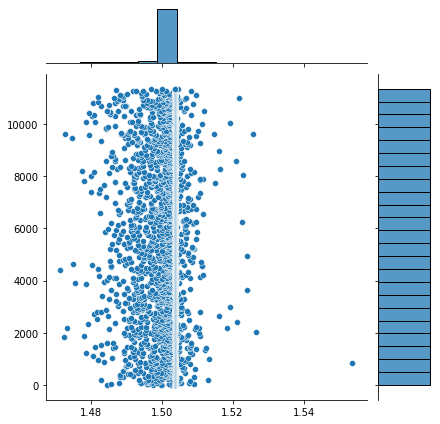

In [ ]:
print(len(predictions))
print(len(data_eval))
error = predictions.transpose() - data_eval
error_arr = np.array(error[0])
print(error_arr)
index = [i for i in range(0,len(data_eval))]
sns.jointplot(x=predictions.transpose()[0],y=index)

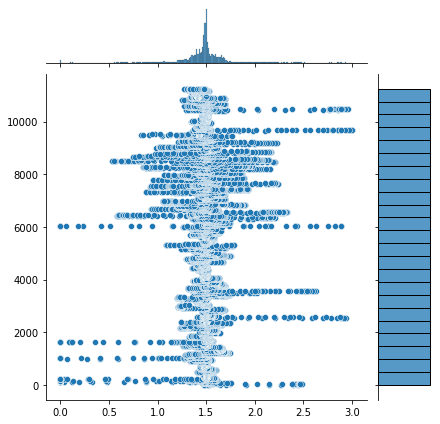

In [ ]:
index = [i for i in range(0,len(data_eval[100:]))]
sns.jointplot(x=data_eval[100:],y=index)

11351
11351
[-1.33653529 -1.06508146 -0.63432024 ... -0.14201189 -0.15465107
 -0.02883615]


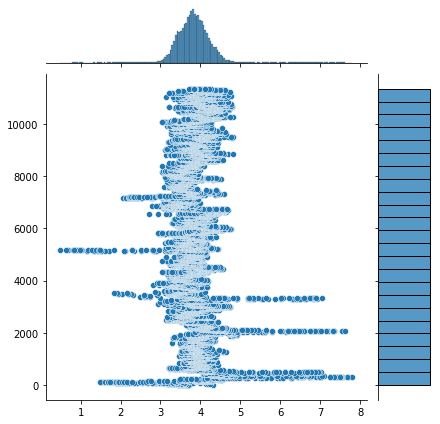

In [ ]:
'''model = Sequential()

model.add(Conv2D(filters=36,kernel_size=(5,5),activation = "ReLU",input_shape=(dimx, dimy, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=48,kernel_size=(5,5),activation = "ReLU",strides = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = "ReLU"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = "ReLU"))
model.add(AvgPool2D())

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1000))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

mse = tf.keras.losses.MeanSquaredError()
mape = MeanAbsolutePercentageError()

from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(loss=mse ,optimizer='adam',metrics=['mse', coeff_determination])

model.summary()'''
print(len(predictions))
print(len(data_train[:11351]))
error = predictions.transpose() - data_train[:11351]
error_arr = np.array(error[0])
print(error_arr)
index = [i for i in range(0,len(data_train[:11351]))]
sns.jointplot(x=predictions.transpose()[0],y=index)

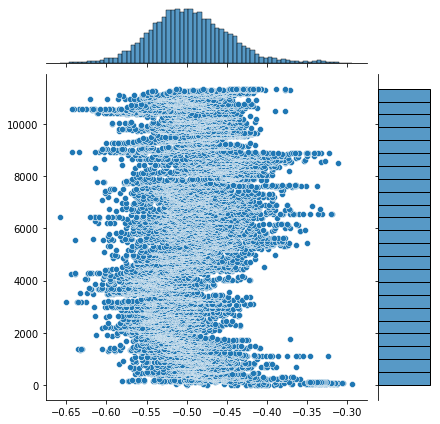

In [ ]:
sns.jointplot(x=predictions.transpose()[0],y=index)

In [ ]:
model.save('my_model.h5')